# Python - Portfolio Value-at-Risk

### 1. Revisit the all-weather portfolio you crafted. Put the portfolio daily and cumulative returns of the three portfolios (i.e., equally-weighted, maximum Sharpe, or minimum volatility) side-by-side in a dataframe.

In [1]:
# Install yahoo finance API package
# Once installed, comment this out
# !pip install yfinance --upgrade --no-cache-dir

In [2]:
# Import the necessary packages
import yfinance as yf
import datetime as dt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Place the list of stocks that form your all-weather portfolio in Data Lab 2
# Draw data for the past five years

symbols_list = ["AAPL", "AMZN", "GOOG", "BP", "KMI", "BABA", "TCEHY", "BYDDY", "PAAS", "CCJ"]  
trading_days_per_year = 252

start = dt.datetime(2017,8,31)
end = dt.datetime(2022,8,31)
data = yf.download(symbols_list, start=start, end=end)

[*********************100%***********************]  10 of 10 completed


In [4]:
prices = data['Adj Close']

In [5]:
# Calculate return using method pct_change

daily_returns = prices.pct_change()

In [6]:
daily_returns.head()

,AAPL,AMZN,BABA,BP,BYDDY,CCJ,GOOG,KMI,PAAS,TCEHY
Date,,,,,,,,,,
2017-08-31 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01 00:00:00-04:00,0.000305,-0.002396,-0.004076,0.001152,0.001672,-0.001994,-0.002119,0.001552,0.001072,-0.007796
2017-09-05 00:00:00-04:00,-0.012008,-0.013269,-0.006548,0.005177,-0.010851,-0.004995,-0.009484,-0.000516,0.025161,-0.025476
2017-09-06 00:00:00-04:00,-0.001049,0.002621,-0.010476,0.010587,0.016878,0.011044,-0.000689,-0.001034,-0.019321,0.020278
2017-09-07 00:00:00-04:00,-0.004015,0.012058,0.013917,0.005096,0.006639,0.005959,0.008773,-0.009829,0.010117,-0.008621


In [7]:
# function that takes portfolio weights and creates a time-series of daily portfolio returns
def portfolio_return_series(daily_returns, weights):
    
    ''' 
    INPUTS
    daily returns: dataframe of daily returns. Each ticker column contains the series of daily returns for the ticker
    weights: numpy array of the portfolio weight on each ticker (sorted in ascending order)
    
    OUTPUTS
    portfolio_daily_returns: the portfolio return series given the weights
    portfolio_cumulative_returns: the portfolio cumulative return series given the weights
    '''    

    # Portfolio daily returns
    portfolio_daily_returns = daily_returns.dot(weights)
    
    # Cumulative Portfolio Returns
    portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()

    return portfolio_daily_returns, portfolio_cumulative_returns

In [8]:
# Install PyPortfolioOpt package
# Once installed, comment this out
# !pip install PyPortfolioOpt

# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [9]:
prices

,AAPL,AMZN,BABA,BP,BYDDY,CCJ,GOOG,KMI,PAAS,TCEHY
Date,,,,,,,,,,
2017-08-31 00:00:00-04:00,38.788013,49.029999,171.740005,25.433840,11.830295,9.631618,46.966499,14.199035,17.382149,39.583214
2017-09-01 00:00:00-04:00,38.799835,48.912498,171.039993,25.463137,11.850078,9.612412,46.867001,14.221072,17.400776,39.274628
2017-09-05 00:00:00-04:00,38.333912,48.263500,169.919998,25.594954,11.721490,9.564399,46.422501,14.213728,17.838596,38.274059
2017-09-06 00:00:00-04:00,38.293705,48.389999,168.139999,25.865915,11.919321,9.670028,46.390499,14.199035,17.493933,39.050198
2017-09-07 00:00:00-04:00,38.139973,48.973499,170.479996,25.997734,11.998453,9.727647,46.797501,14.059467,17.670919,38.713554
...,...,...,...,...,...,...,...,...,...,...
2022-08-24 00:00:00-04:00,166.997574,133.800003,92.519997,31.635138,67.070000,26.905800,114.699997,18.621677,16.318720,38.073009
2022-08-25 00:00:00-04:00,169.489624,137.279999,99.889999,32.007431,68.010002,27.144873,117.699997,18.679869,16.427246,40.151787
2022-08-26 00:00:00-04:00,163.099991,130.750000,98.000000,31.674326,67.470001,26.557150,111.300003,18.418001,15.677416,39.164604


The Maximum Sharpe Portfolio

In [9]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(prices)

# Calculate the covariance matrix sigma
sigma = risk_models.sample_cov(prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
optimal_weights_maxsharpe = np.array(list(cleaned_weights_maxsharpe.values()))

# Inspect the calculated weights
print(cleaned_weights_maxsharpe)

OrderedDict([('AAPL', 0.68484), ('AMZN', 0.0), ('BABA', 0.0), ('BP', 0.0), ('BYDDY', 0.20913), ('CCJ', 0.10603), ('GOOG', 0.0), ('KMI', 0.0), ('PAAS', 0.0), ('TCEHY', 0.0)])


The minimum volatility portfolio

In [34]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

# Calculate weights for the minimum volatility portfolio
raw_weights_minvolatility = ef.min_volatility()
cleaned_weights_minvolatility = ef.clean_weights()
optimal_weights_minvolatility = np.array(list(cleaned_weights_minvolatility.values()))

# Inspect the calculated weights
print(cleaned_weights_minvolatility)

OrderedDict([('AAPL', 0.09163), ('AMZN', 0.15241), ('BABA', 0.00783), ('BP', 0.07293), ('BYDDY', 0.01058), ('CCJ', 0.0152), ('GOOG', 0.20008), ('KMI', 0.26248), ('PAAS', 0.10673), ('TCEHY', 0.08013)])


In [11]:
# 1. Daily portfolio returns for the equally-weighted portfolio
equal_weightage = 1 / len(symbols_list)
equal_weights = np.repeat(equal_weightage, len(symbols_list))

# Extract the first & second elements from the function output for daily returns and cumulative returns
ew_daily_returns, ew_cum_returns = portfolio_return_series(daily_returns, equal_weights)


# 2. Daily portfolio returns for the maximum Sharpe portfolio
# Extract the first & second elements from the function output for daily returns and cumulative returns
ms_daily_returns, ms_cum_returns = portfolio_return_series(daily_returns, optimal_weights_maxsharpe)


# 3. Daily portfolio returns for the minimum volatility portfolio
# Extract the first & second elements from the function output for daily returns and cumulative returns
mv_daily_returns, mv_cum_returns = portfolio_return_series(daily_returns, optimal_weights_minvolatility)


# Merge the six series side-by-side into a dataframe
# Note the index is date
portfolio_returns = pd.concat([ew_daily_returns, ew_cum_returns, ms_daily_returns, ms_cum_returns, mv_daily_returns, mv_cum_returns], axis = 1)

# Rename column names
portfolio_returns.columns = ['E.W. daily', 'E.W. cum', 'M.S. daily', 'M.S. cum', 'M.V. daily', 'M.V. cum']

In [12]:
# Drop first row as it is NaN
portfolio_returns = portfolio_returns.iloc[1: , :]

# Inspect the first five rows of the dataframe (e.g., portfolio_returns)
portfolio_returns.head()

,E.W. daily,E.W. cum,M.S. daily,M.S. cum,M.V. daily,M.V. cum
Date,,,,,,
2017-08-31,0.009126,1.009126,0.002773,1.002773,0.011836,1.011836
2017-09-01,-0.001263,1.007852,0.000347,1.003121,-0.000825,1.011001
2017-09-05,-0.005281,1.002529,-0.011023,0.992064,-0.004376,1.006577
2017-09-06,0.002884,1.005421,0.003982,0.996014,0.000493,1.007074
2017-09-07,0.004009,1.009452,-0.000729,0.995288,0.001676,1.008761


### 2. Examine visually the drawdown behavior of each portfolio.


In [13]:
# function that takes cumulative portfolio returns and creates a time-series of percentage drawdown
def portfolio_drawdown(cumulative_portfolio_returns):
    
    ''' 
    INPUTS
    cumulative_portfolio_returns: the portfolio cumulative return series
    
    OUTPUTS
    percentage drawdown series
    
    '''    

    # Calculate the running maximum
    running_max = np.maximum.accumulate(cumulative_portfolio_returns)

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the percentage drawdown
    drawdown = cumulative_portfolio_returns / running_max - 1
    
    return drawdown

In [14]:
# function that takes in the drawdown series of a portfolio and plots its corresponding line graph
def drawdown_visualiser(drawdown, color, portfolio_type):
    
    ''' 
    INPUTS
    drawdown: percentage drawdown series
    color: a string representing the color of the graph
    portfolio_type: a string of the portfolio type to use as the title of the graph
    '''    

    #1 Create Plot
    plt.plot(drawdown, color = color)

    #2 Customise Plot
    plt.xlabel('Year')
    plt.ylabel('Percentage Drawdown')
    plt.title(portfolio_type)

    #3 Show Plot
    plt.show()

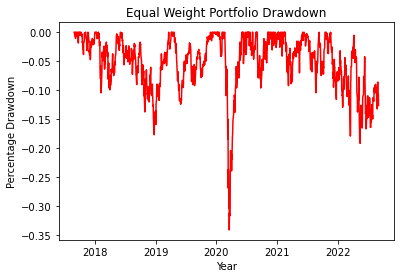

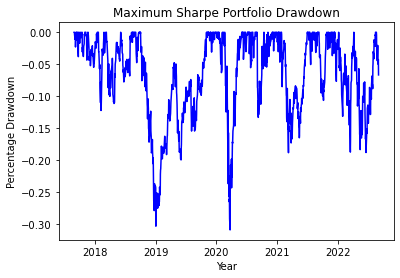

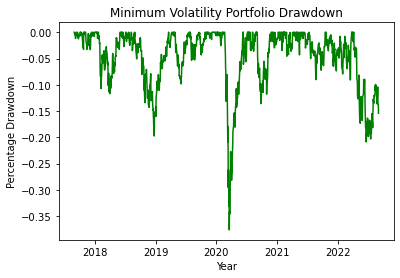

In [15]:
import matplotlib.pyplot as plt

# Extract the percentage drawdown series for the equal weight portfolio
ew_drawdown = portfolio_drawdown(portfolio_returns['E.W. cum'])

# Extract the percentage drawdown series for the maximum Sharpe portfolio
ms_drawdown = portfolio_drawdown(portfolio_returns['M.S. cum'])

# Extract the percentage drawdown series for the minimum volatility portfolio
mv_drawdown = portfolio_drawdown(portfolio_returns['M.V. cum'])

# Plot each drawdown series using the 'drawdown_visualiser' function
drawdown_visualiser(ew_drawdown, "red", "Equal Weight Portfolio Drawdown")
drawdown_visualiser(ms_drawdown, "blue", "Maximum Sharpe Portfolio Drawdown")
drawdown_visualiser(mv_drawdown, "green", "Minimum Volatility Portfolio Drawdown")

### 3. Calculate the Value-at-Risk of each portfolio at 99% using the empirical (historical) distribution and theoretical distribution. Create graphs that show the empirical distribution with two vertical lines, representing the Value-at-Risk at 99% derived from the empirical and theoretical distribution, respectively.


In [16]:
# Import norm from scipy.stats
from scipy.stats import norm

# function that takes portfolio weights and creates a time-series of daily portfolio returns
def portfolio_var(daily_portfolio_returns, level, portfolio_type):
    
    ''' 
    INPUTS
    daily_portfolio_returns: the portfolio daily return series
    level: tail risk at 90%, 95%, or 99% ## enter 90 for 90% and so on!
    portfolio_type: a string of the portfolio type to use as the title of the graph
    
    OUTPUT
    Empirical VaR: Value at Risk of the portfolio using the empirical distribution 
                   at the specified level (e.g., 90%, 95%, or 99%)
    Theoretical VaR: Value at Risk of the portfolio using mathematical formulas (sampling distribution) 
                     at the specified level (e.g., 90%, 95%, or 99%)
    Plot object: empirical distribution of returns with 
                 two lines indicating the empirical and theoretical VaRs at the specified level
    
    '''    

    # Calculate the tail risk (i.e., 100 - level)
    tail_risk = 100 - level
    
    # Calculate empirical historical VaR at specified level
    var_empirical = np.percentile(daily_portfolio_returns, tail_risk)
    
    # Calculate theoretical VaR at specified level
    # Note the norm.ppf function takes argument tail risk of 99% in 0.99, instead of 99
    mu = np.mean(daily_portfolio_returns)
    vol = np.std(daily_portfolio_returns)
    var_theoretical = norm.ppf(tail_risk / 100, mu, vol)
    
    # Sort the returns for plotting
    sorted_daily_portfolio_returns = sorted(daily_portfolio_returns)
    
    # Plot the probability of each sorted return quantile
    plt.hist(sorted_daily_portfolio_returns, density = True, 
             stacked = True, alpha = 0.3, ec = 'black', bins = 15)

    # Denote the VaR 99 quantile and plot the vertical lines
    plt.axvline(x = var_empirical, color = 'r', linestyle = '-')
    plt.axvline(x = var_theoretical, color = 'g', linestyle = '-')
    
    plt.xlabel('Returns (%)')
    plt.ylabel('Probability')
    plt.xlim(-0.10,0.10)
    plt.title(portfolio_type)
    
    plt.show()
    
    print("Tail Risk: " + str(tail_risk) + "%")
    print("Var Empirical: " + str(var_empirical))
    print("Var Theoretical: " + str(var_theoretical))
    
    return tail_risk, var_empirical, var_theoretical

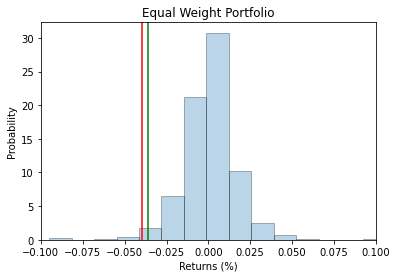

Tail Risk: 1%
Var Empirical: -0.03957283433516163
Var Theoretical: -0.036150961766913875


In [17]:
# Call the function to calculate and plot VaR for the Equally Weighted Portfolio at 99%
ew_tail_risk, ew_var_empirical, ew_var_theoretical = portfolio_var(portfolio_returns['E.W. daily'], 99, "Equal Weight Portfolio")

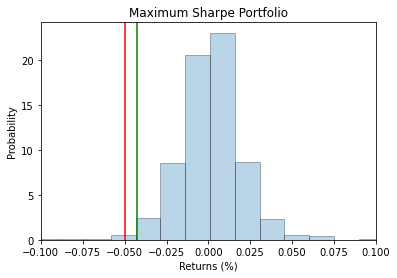

Tail Risk: 1%
Var Empirical: -0.049988598199676396
Var Theoretical: -0.04261609457954742


In [18]:
# Call the function to calculate and plot VaR for the Maximum Sharpe Portfolio at 99%
ms_tail_risk, ms_var_empirical, ms_var_theoretical = portfolio_var(portfolio_returns['M.S. daily'], 99, "Maximum Sharpe Portfolio")

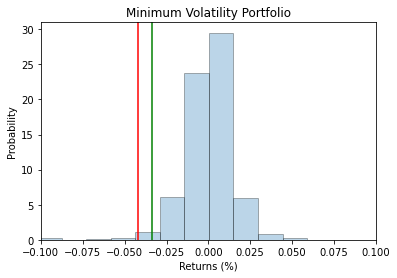

Tail Risk: 1%
Var Empirical: -0.04181760735393914
Var Theoretical: -0.03383339696800777


In [19]:
# Call the function to calculate and plot VaR for the Minimum Volatility Portfolio at 99%
mv_tail_risk, mv_var_empirical, mv_var_theoretical = portfolio_var(portfolio_returns['M.V. daily'], 99, "Minimum Volatility Portfolio")

### 4. Is the portfolio return for the maximum Sharpe portfolio statistically different from that of the equally-weighted portfolio?

In [20]:
# Install Pingouin
# Once installed, you can comment this out
# !pip install pingouin

In [12]:
# Import pingouin - a simple but powerful statistical package
import pingouin as pg

dir(pg)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_check_dataframe',
 '_check_eftype',
 '_flatten_list',
 '_is_mpmath_installed',
 '_is_sklearn_installed',
 '_is_statsmodels_installed',
 '_perm_pval',
 '_postprocess_dataframe',
 'ancova',
 'anderson',
 'anova',
 'bayesfactor_binom',
 'bayesfactor_pearson',
 'bayesfactor_ttest',
 'bayesian',
 'box_m',
 'chi2_independence',
 'chi2_mcnemar',
 'circ_axial',
 'circ_corrcc',
 'circ_corrcl',
 'circ_mean',
 'circ_r',
 'circ_rayleigh',
 'circ_vtest',
 'circular',
 'cochran',
 'compute_bootci',
 'compute_effsize',
 'compute_effsize_from_t',
 'compute_esci',
 'config',
 'contingency',
 'convert_angles',
 'convert_effsize',
 'corr',
 'correlation',
 'cronbach_alpha',
 'datasets',
 'dichotomous_crosstab',
 'distance_corr',
 'distribution',
 'effsize',
 'epsilon',
 'equivalence',
 'friedman',
 'gzscore',
 'harrelldavis',
 'homoscedasticity',
 'intraclass_c

/Users/lucatriglia/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [22]:
help(pg.ttest)

Help on function ttest in module pingouin.parametric:

ttest(x, y, paired=False, alternative='two-sided', correction='auto', r=0.707, confidence=0.95)
    T-test.
    
    Parameters
    ----------
    x : array_like
        First set of observations.
    y : array_like or float
        Second set of observations. If ``y`` is a single value, a one-sample
        T-test is computed against that value (= "mu" in the t.test R
        function).
    paired : boolean
        Specify whether the two observations are related (i.e. repeated
        measures) or independent.
    alternative : string
        Defines the alternative hypothesis, or tail of the test. Must be one of
        "two-sided" (default), "greater" or "less". Both "greater" and "less" return one-sided
        p-values. "greater" tests against the alternative hypothesis that the mean of ``x``
        is greater than the mean of ``y``.
    correction : string or boolean
        For unpaired two sample T-tests, specify whether 

In [32]:
# Conduct a independent t-test on equally-weighted portfolio and max sharpe portfolio
# The null hypothesis is that their mean returns are equal

# Calculate and print the paired test results
independent_test_results = pg.ttest(x = portfolio_returns['E.W. daily'], 
                               y = portfolio_returns['M.S. daily'], 
                               paired = False, alternative = "two-sided",
                               confidence = 0.95)

print("Independent t-test results:\n")
print(independent_test_results)

Independent t-test results:

              T   dof alternative     p-val        CI95%  cohen-d  BF10  \
T-test -0.94776  2514   two-sided  0.343343  [-0.0, 0.0]  0.03779  0.07   

           power  
T-test  0.157456  


Since the p-val is > 0.05 we do not have sufficient evidence to reject the null hypothesis that the mean returns of the two portfolios are equal

In [33]:
# Calculate and print the paired test results
paired_test_results = pg.ttest(x = portfolio_returns['E.W. daily'], 
                               y = portfolio_returns['M.S. daily'], 
                               paired = True, alternative = "two-sided",
                               confidence = 0.95)

print("\nPaired t-test returns:\n")
print(paired_test_results)


Paired t-test returns:

               T   dof alternative     p-val         CI95%  cohen-d   BF10  \
T-test -2.343316  1257   two-sided  0.019268  [-0.0, -0.0]  0.03779  0.489   

           power  
T-test  0.267899  


Since the p-val is > 0.05 we do not have sufficient evidence to reject the null hypothesis that the mean returns of the two portfolios are equal

For the purpose of this experiment, we should use the **paired test** of difference in portfolio mean returns as the underlying stocks in the equal weight portfolio and the max sharpe portfolio are the same. 

#### Optional Bonus: Additional Test for The Curious: The equality of mean portfolio returns across equally weighted, maximum-Sharpe, and minimum-volatility portfolios.

In [25]:
# Deep dive into the ANOVA test
# Hint: help(pg.anova)
help(pg.anova)

Help on function anova in module pingouin.parametric:

anova(data=None, dv=None, between=None, ss_type=2, detailed=False, effsize='np2')
    One-way and *N*-way ANOVA.
    
    Parameters
    ----------
    data : :py:class:`pandas.DataFrame`
        DataFrame. Note that this function can also directly be used as a
        Pandas method, in which case this argument is no longer needed.
    dv : string
        Name of column in ``data`` containing the dependent variable.
    between : string or list with *N* elements
        Name of column(s) in ``data`` containing the between-subject factor(s).
        If ``between`` is a single string, a one-way ANOVA is computed.
        If ``between`` is a list with two or more elements, a *N*-way ANOVA is
        performed.
        Note that Pingouin will internally call statsmodels to calculate
        ANOVA with 3 or more factors, or unbalanced two-way ANOVA.
    ss_type : int
        Specify how the sums of squares is calculated for *unbalanced*

In [26]:
# Subset the portfolio to remove cumulative return columns (as we don't want to compare cumulative returns with daily returns)
portfolio_returns_subset = portfolio_returns[['E.W. daily', 'M.S. daily', 'M.V. daily']]

# Reshape the dataframe, such that we have a column for portfolio type
# Hint: Use dataframe's method .unstack
unstacked_portfolio_returns = portfolio_returns_subset.unstack()

In [27]:
# Inspect the dataframe
unstacked_portfolio_returns.head()

            Date      
E.W. daily  2017-08-31    0.009126
            2017-09-01   -0.001263
            2017-09-05   -0.005281
            2017-09-06    0.002884
            2017-09-07    0.004009
dtype: float64

In [28]:
# Turn multiindex into columns
# Hint: reset the index with dataframe's method .reset_index()
unstacked_portfolio_returns = unstacked_portfolio_returns.reset_index()

In [29]:
# Rename column names
unstacked_portfolio_returns.columns = ['Portfolio Type', 'Date', 'Return']

# Inspect dataframe
print(unstacked_portfolio_returns)

     Portfolio Type       Date    Return
0        E.W. daily 2017-08-31  0.009126
1        E.W. daily 2017-09-01 -0.001263
2        E.W. daily 2017-09-05 -0.005281
3        E.W. daily 2017-09-06  0.002884
4        E.W. daily 2017-09-07  0.004009
...             ...        ...       ...
3769     M.V. daily 2022-08-24  0.008298
3770     M.V. daily 2022-08-25  0.018235
3771     M.V. daily 2022-08-26 -0.033425
3772     M.V. daily 2022-08-29 -0.005428
3773     M.V. daily 2022-08-30 -0.017754

[3774 rows x 3 columns]


In [30]:
# Test the equality of portfolio mean returns across three portfolio construction methods
# The null hypothesis is that their mean returns are equal
# Hint: use pg.anova
anova_results = pg.anova(data = unstacked_portfolio_returns, dv = 'Return', 
                         between = 'Portfolio Type')

print(anova_results)

           Source  ddof1  ddof2         F     p-unc       np2
0  Portfolio Type      2   3771  0.777089  0.459816  0.000412


### 5. Optional Bonus. What other hypotheses would you like to test? How do you test them? What do you find? 

I would like to find out whether the mean returns are different for stocks with 'Buy' rating compared to stocks with 'Hold/Sell' Rating

In [4]:
symbols_list = ["MSFT", "GME", "JPM", "GPRO", "META", "CLX"]

#sort the list alphabetically
symbols_list = sorted(symbols_list)

#taking only for the past 2 years
start = dt.datetime(2020,9,12)
end = dt.datetime(2022,9,12)
data = yf.download(symbols_list, start=start, end=end)

# Find daily returns for every stock 
prices = data['Adj Close']
daily_returns = prices.pct_change()
daily_returns = daily_returns.iloc[1: , :]


# Create an empty boolean array which will contain True if the stock is 'Buy' rating and False if the stock is not
is_buy_rating = []

for symbol in symbols_list:
    
    msft = yf.Ticker(symbol)
    recommendations = msft.recommendations
    
    #take the mode of the recommendations to get the most general concensus
    recommendation = str(recommendations['To Grade'].mode()[0])
    
    # Put True in the boolean array if the stock recommendation is a buy
    is_buy_rating.append(recommendation == 'Buy')

[*********************100%***********************]  6 of 6 completed


In [5]:
# Select from the dataframe the stocks with a buy rating:
buy_rating_stocks = daily_returns.loc[:,is_buy_rating]

print("Buy Rating Stocks")
print(buy_rating_stocks)

Buy Rating Stocks
                 JPM      META      MSFT
Date                                    
2020-09-14  0.013852 -0.001725  0.006764
2020-09-15 -0.031131  0.023558  0.016406
2020-09-16  0.004230 -0.032670 -0.017866
2020-09-17 -0.011434 -0.033015 -0.010436
2020-09-18 -0.002131 -0.008987 -0.012419
...              ...       ...       ...
2022-09-02 -0.006986 -0.030479 -0.016667
2022-09-06  0.000264 -0.011103 -0.010974
2022-09-07  0.018991  0.011669  0.019112
2022-09-08  0.023296  0.010412  0.001666
2022-09-09  0.004806  0.043749  0.022977

[502 rows x 3 columns]


In [6]:
# Now that we have identified the stocks which have a buy rating, we stack the returns on top of each other
buy_rating_returns = pd.concat([buy_rating_stocks['JPM'], 
                                buy_rating_stocks['META'], 
                                buy_rating_stocks['MSFT']])

In [7]:
# We repeat this process for the sell/hold rating returns:
sell_rating_stocks = daily_returns.loc[:,[not elem for elem in is_buy_rating]]
print("Sell Rating Stocks")
print(sell_rating_stocks)

Sell Rating Stocks
                 CLX       GME      GPRO
Date                                    
2020-09-14  0.016168  0.134647  0.026667
2020-09-15 -0.036191  0.026049  0.010390
2020-09-16 -0.010688  0.224260  0.035990
2020-09-17 -0.002411  0.059908 -0.002481
2020-09-18  0.006285  0.029348  0.000000
...              ...       ...       ...
2022-09-02 -0.020905 -0.009772 -0.010067
2022-09-06 -0.000980 -0.081140 -0.037288
2022-09-07  0.025787 -0.043755  0.021127
2022-09-08 -0.004030  0.074459 -0.003448
2022-09-09  0.016187  0.119628  0.025951

[502 rows x 3 columns]


In [8]:
sell_rating_returns = pd.concat([sell_rating_stocks['CLX'], 
                                 sell_rating_stocks['GME'], 
                                 sell_rating_stocks['GPRO']])

In [9]:
# Next we add the two columns into a single dataframe
returns = pd.concat([buy_rating_returns,sell_rating_returns], axis = 1)

# Rename Columns
returns.columns = ['Buy', 'Hold/Sell']
returns = returns.reset_index()
print(returns)

           Date       Buy  Hold/Sell
0    2020-09-14  0.013852   0.016168
1    2020-09-15 -0.031131  -0.036191
2    2020-09-16  0.004230  -0.010688
3    2020-09-17 -0.011434  -0.002411
4    2020-09-18 -0.002131   0.006285
...         ...       ...        ...
1501 2022-09-02 -0.016667  -0.010067
1502 2022-09-06 -0.010974  -0.037288
1503 2022-09-07  0.019112   0.021127
1504 2022-09-08  0.001666  -0.003448
1505 2022-09-09  0.022977   0.025951

[1506 rows x 3 columns]


           Date       Buy  Hold/Sell
1501 2022-09-02 -0.016667  -0.010067
1502 2022-09-06 -0.010974  -0.037288
1503 2022-09-07  0.019112   0.021127
1504 2022-09-08  0.001666  -0.003448
1505 2022-09-09  0.022977   0.025951


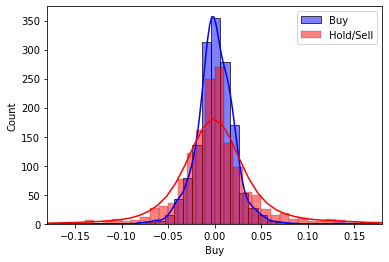

In [10]:
print(returns.tail())
# Visualise the returns 

import seaborn as sns

sns.histplot(data = returns, x = 'Buy', color="blue", 
             label = 'Buy', binwidth = 0.01, kde = True)

sns.histplot(data = returns, x = 'Hold/Sell', color="red", 
             label = 'Hold/Sell', binwidth = 0.01, kde = True)

plt.xlim(-0.18,0.18)
plt.legend() 
plt.show()

In [13]:
# Now we can run the analysis

test_results = pg.ttest(x = returns['Buy'], y = returns['Hold/Sell'], 
                        paired = False, alternative = "two-sided")
                              
# Print the paired test results
print(test_results)

               T   dof alternative     p-val          CI95%  cohen-d  BF10  \
T-test -2.090729  3010   two-sided  0.036636  [-0.01, -0.0]  0.07619  0.36   

           power  
T-test  0.551781  


Hence, given that the p-value is smaller than 0.05 we reject the null hypothesis that the mean returns between buy and sell groups are the same. 